## Primary Goals: 
* Predict diabetes (binary classification)
* Explore multiple neural network models
* Adjust unbalanced dataset

### Data importation and exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as TTS
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Users/ruojiakuang/Desktop/GSB 545 Advanced ML/Lab 4 Dataset/diabetes_binary_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [4]:
# convert floats to ints
for column in df:
    if df[column].dtype == 'float64':
        df[column] = np.float64(df[column]).astype(np.int64)

In [5]:
df.dtypes

Diabetes_binary         int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

In [6]:
df['Diabetes_binary'].value_counts()

0    218334
1     35346
Name: Diabetes_binary, dtype: int64

### Split data for Model training and testing purpose

In [7]:
# Split the data into predictor and target variables
X = df.drop(columns = ['Diabetes_binary'])
y = df['Diabetes_binary']

# Split the data into training and testing sets
Xtrain, Xtest, Ytrain, Ytest = TTS(X,y,test_size=0.3,random_state=1412)

Ytest.describe()

count    76104.000000
mean         0.139060
std          0.346011
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Diabetes_binary, dtype: float64

### Resampling for imbalanced class
In our case since we have relatively large sample of data, we will go for undersampling as implemented in below chunk. In this case we will also evaluate the model based on recall, accuracy and overall confusion matrix performance.

In [8]:
from imblearn.under_sampling import RandomUnderSampler

# define the undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the undersampling to the training data
Xtrain, Ytrain = undersample.fit_resample(Xtrain, Ytrain)

## Modeling

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import models
from sklearn import preprocessing
import pydot
import graphviz
from sklearn.metrics import mean_squared_error
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

2024-05-12 21:38:00.063055: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Neural Networks Model 1

In [10]:
#construct the model
inputs = keras.Input(shape=(21,))
x = layers.Dense(22, activation = 'relu')(inputs)
x = layers.Dense(15, activation = 'relu')(x)

# for diabetes output, we have 2 different categories, so the output of our model is 2
outputs = layers.Dense(2, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="Diabetes_model")

In [11]:
model.summary()

Model: "Diabetes_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 21)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 22)             │           484 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           345 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            32 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 861 (3.36 KB)

 Trainable params: 861 (3.36 KB)

 Non-trainable params: 0 (0.00 B)

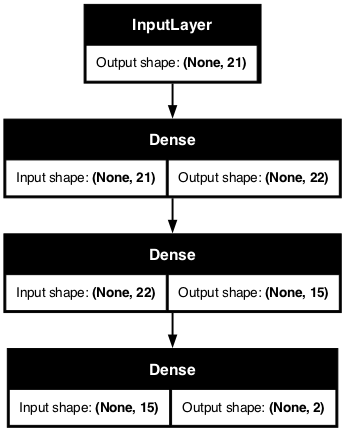

In [12]:
keras.utils.plot_model(model, show_shapes = True, dpi=70)

In [13]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(Xtrain, Ytrain, batch_size=64, epochs=10, validation_split=0.1)

scores = model.evaluate(Xtest, Ytest, verbose=2)

Epoch 1/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6644 - loss: 0.6528 - val_accuracy: 0.7198 - val_loss: 0.5694
Epoch 2/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7250 - loss: 0.5352 - val_accuracy: 0.8264 - val_loss: 0.4433
Epoch 3/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7355 - loss: 0.5245 - val_accuracy: 0.8153 - val_loss: 0.4560
Epoch 4/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7368 - loss: 0.5214 - val_accuracy: 0.6384 - val_loss: 0.6869
Epoch 5/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7410 - loss: 0.5152 - val_accuracy: 0.5088 - val_loss: 0.8407
Epoch 6/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7418 - loss: 0.5131 - val_accuracy: 0.5203 - val_loss: 0.8443
Epoch 7/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7408 - loss: 0.5158 - val_accuracy: 0.6909 - val_loss: 0.6307
Epoch 8/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7409 - loss: 0.5128 - val_accuracy: 0.

In [14]:
y_pred = model.predict(Xtest)
y_pred.shape

2379/2379 ━━━━━━━━━━━━━━━━━━━━ 2s 860us/step


(76104, 2)

In [15]:
# convert probabilities to lables
predicted_classes = np.argmax(y_pred, axis=1)
predicted_classes

array([0, 0, 0, ..., 0, 1, 0])

In [16]:
# Calculate accuracy
accuracy = accuracy_score(Ytest, predicted_classes)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(Ytest,predicted_classes)
print("Precision:", precision)

# Calculate recall
recall = recall_score(Ytest, predicted_classes)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(Ytest, predicted_classes)
print("F1-score:", f1)

Accuracy: 0.6622516556291391
Precision: 0.2719374981146873
Recall: 0.8518378531607295
F1-score: 0.4122650569351077


### Neural Networks Model 2

In [17]:
#construct the model
inputs = keras.Input(shape=(21,))
x = layers.Dense(200, activation = 'relu')(inputs)
x = layers.Dense(150, activation = 'relu')(x)
# for nation output, we have 2 different categories, so the output of our model is 2
outputs = layers.Dense(2, activation='sigmoid')(x)
model2 = keras.Model(inputs=inputs, outputs=outputs, name="Diabetes_model2")

In [18]:
model2.summary()

Model: "Diabetes_model2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 21)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 200)            │         4,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           302 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,852 (136.14 KB)

 Trainable params: 34,852 (136.14 KB)

 Non-trainable params: 0 (0.00 B)

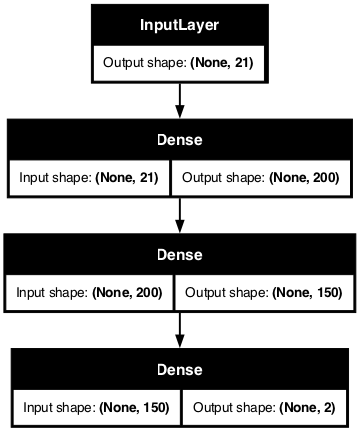

In [19]:
keras.utils.plot_model(model2, show_shapes = True,  dpi=70)

In [20]:
model2.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model2.fit(Xtrain, Ytrain, batch_size=64, epochs=10, validation_split=0.1)

scores = model2.evaluate(Xtest, Ytest, verbose=2)

Epoch 1/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6681 - loss: 0.6473 - val_accuracy: 0.7712 - val_loss: 0.5645
Epoch 2/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7310 - loss: 0.5290 - val_accuracy: 0.6770 - val_loss: 0.6473
Epoch 3/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7319 - loss: 0.5236 - val_accuracy: 0.7208 - val_loss: 0.6172
Epoch 4/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7368 - loss: 0.5173 - val_accuracy: 0.6796 - val_loss: 0.6750
Epoch 5/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7432 - loss: 0.5134 - val_accuracy: 0.6533 - val_loss: 0.6665
Epoch 6/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7394 - loss: 0.5139 - val_accuracy: 0.6756 - val_loss: 0.6943
Epoch 7/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7417 - loss: 0.5120 - val_accuracy: 0.7004 - val_loss: 0.6198
Epoch 8/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7427 - loss: 0.5134 - val_accuracy: 0.

In [21]:
y_pred = model2.predict(Xtest)
y_pred.shape

2379/2379 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


(76104, 2)

In [22]:
# convert probabilities to lables
predicted_classes = np.argmax(y_pred, axis=1)
predicted_classes

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
# Calculate accuracy
accuracy = accuracy_score(Ytest, predicted_classes)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(Ytest,predicted_classes)
print("Precision:", precision)

# Calculate recall
recall = recall_score(Ytest, predicted_classes)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(Ytest, predicted_classes)
print("F1-score:", f1)

Accuracy: 0.7868968779564806
Precision: 0.3555054105338735
Recall: 0.6550127563072853
F1-score: 0.4608736121268533


Overall, model 2 has better performance since it has higher F1-score 0.4609 .

### XGBoosting Model

In [25]:
# define XGBClassifier model with scale_pos_weight parameter
xgboost_model = XGBClassifier()

# Fit the stacking model on the training data
xgboost_model.fit(Xtrain, Ytrain)

# Evaluate the performance of the stacking model on the test data
Ypred = xgboost_model.predict(Xtest)
recall = recall_score(Ytest, Ypred)
print("Recall:", recall)

cm = confusion_matrix(Ytest, Ypred)
print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(Ytest, Ypred)
print("Accuracy:", accuracy)

# Calculate F1-score
f1 = f1_score(Ytest, Ypred)
print("F1-score:", f1)

Recall: 0.796277048096003
Confusion Matrix:
[[45687 19834]
 [ 2156  8427]]
Accuracy: 0.7110532954903815
F1-score: 0.4338894037689218


### Conclusion

The XGBoost model slightly higher recall rate compared to neural network models, however, neural network model 1 and 2 have higher accuracy rate and F1 score with balanced dataset. We also find that additional hidden layers tend to get better results: compare NN model 2 (200,150) to NN model 1 (22,150), model 2 has higher precision rate. 